<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;"><img style="float: left;" src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" width="257" height="85" align="left" /></div>
<div style="float: right; width: 50%; text-align: right;">M2.851 &middot; Tipologia y Ciclo de vida de los Datos &middot; <br />M&aacute;ster Universitario en Ciencia de Datos (Data Science) Estudios de Inform&aacute;tica, Multimedia y Telecomunicaci&oacute;n</div>
<div style="float: right; width: 50%;">&nbsp;</div>
<div style="width: 100%; clear: both;"><strong>ALUMNA:</strong> PATRICIA REYES SILVA</div>
<div style="width: 100%; clear: both;"><strong>GITHUB:</strong>&nbsp;https://github.com/preyespe/Titanic-Data-Cleaning</div>
<div style="width: 100%; clear: both;"><hr /></div>
</div>


# PAC 2: LIMPIEZA Y VALIDACION DE LOS DATOS

<p style="text-align: justify;">En esta pr&aacute;ctica realizaremos la limpieza y validaci&oacute;n de datos del dataset [TITANIC](https://www.kaggle.com/c/titanic/data) y posteriormente aplicaremos un algoritmo de clasificaci&oacute;n que nos permitir&aacute; predecir la precisi&oacute;n para la sobrevivencia.</p>
<p style="text-align: justify;">El contenido a desarrollar es el siguiente:</p>
<ol start="0">
<li>Carga de datos</li>
<li>Descripci&oacute;n del dataset</li>
<li>Integraci&oacute;n y selecci&oacute;n de los datos de inter&eacute;s a analizar</li>
<li>Limpieza de los datos<br />3.1. Gesti&oacute;n de ceros o elementos vacios<br />3.2.&nbsp;Creación de nuevas variables<br />3.3.&nbsp;Identificaci&oacute;n y tratamiento de valores extremos | Transformación de datos</li>
<li>An&aacute;lisis de los datos<br /> 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).<br /> 4.2. Comprobaci&oacute;n de la normalidad y homogeneidad de la varianza<br /> 4.3. Aplicaci&oacute;n de pruebas estad&iacute;sticas para comparar los grupos de datos</li>
<li>Representaci&oacute;n de los resultados a partir de tablas y gr&aacute;ficas</li>
<li>Conclusiones.</li>
</ol>


## 0. Carga de datos

<p>Los datos contenidos en el dataset *TITANIC* se han dividido en dos grupos:</p>
<ul>
<li>Un conjunto de entrenamiento (train.csv)</li>
<li>Un conjunto de prueba (test.csv)</li>
</ul>
<p style="text-align: justify;">El siguiente c&oacute;digo cargar&aacute; las datos de entrenamiento&nbsp;"train" conteniendo 891 regsitros y otros&nbsp; 418 registros en nuestro conjunto de "test".&nbsp; Podemos comprobar que la carga ha sido correcta, al visualizar los primeros 5 registros del dataset "train".</p>

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Carga de los datos de entrenamiento y test
train = pd.read_csv('../data/input/train.csv')
test = pd.read_csv('../data/input/test.csv')

# Visualizamos las 5 primeras filas del dataset de entrenamiento
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Descripción del dataset

<p style="text-align: justify;">El hundimiento del RMS Titanic es uno de los naufragios m&aacute;s infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundi&oacute; despu&eacute;s de colisionar con un iceberg, matando a 1502 de 2224 pasajeros y tripulantes. Esta sensacional tragedia conmocion&oacute; a la comunidad internacional y condujo a mejores regulaciones de seguridad para los buques. Una de las razones por las que el naufragio provoc&oacute; tal p&eacute;rdida de vidas fue que no hab&iacute;a suficientes botes salvavidas para los pasajeros y la tripulaci&oacute;n. Aunque hubo alg&uacute;n elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas ten&iacute;an m&aacute;s probabilidades de sobrevivir que otros, como las mujeres, los ni&ntilde;os y la clase alta.[<a href="https://www.kaggle.com/c/titanic" rel="nofollow">KAGGLE</a>]</p>

<p style="text-align: justify;">El conjunto de datos objeto de an&aacute;lisis se ha obtenido desde el sitio Kaggle y est&aacute; constituido por 12 caracter&iacute;sticas (columnas) que presentan 1309 pasajeros (filas o registros).&nbsp; A su vez, este dataset se encuentra dividido en dos subdatasets, el primero para entrenamiento, llamado "train" con 891 pasajeros y el segundo para pruebas, llamado "test" con 481 pasajeros.</p>
<p style="text-align: justify;">Entre los campos de este conjunto de datos, encontramos los siguientes:</p>

<table style="height: 705px;" border="#C00" width="556">
<tbody>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p><strong>Nro. Item</strong></p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p><strong>Variable</strong></p>
</td>
<td style="height: 45px; width: 389.333px;">
<p><strong>Descripci&oacute;n</strong></p>
</td>
</tr>
<tr style="height: 32.3333px;">
<td style="height: 32.3333px; width: 46px;">
<p>1</p>
</td>
<td style="height: 32.3333px; width: 99.3333px;">
<p>PassengerId</p>
</td>
<td style="height: 32.3333px; width: 389.333px;">
<p>Passenger ID</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>2</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Survived</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Survived (0 = No; 1 = Yes)</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>3</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Pclass</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>4</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Name</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Name</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>5</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Sex</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Sex</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>6</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Age</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Age</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>7</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Sibsp</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Number of Siblings/Spouses Aboard</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>8</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Parch</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Number of Parents/Children Aboard</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>9</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Ticket</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Ticket Number</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>10</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Fare</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Tarifa del pasaje</p>
</td>
</tr>
<tr style="height: 45px;">
<td style="height: 45px; width: 46px;">
<p>11</p>
</td>
<td style="height: 45px; width: 99.3333px;">
<p>Cabin</p>
</td>
<td style="height: 45px; width: 389.333px;">
<p>Nro. de Cabina</p>
</td>
</tr>
<tr style="height: 63px;">
<td style="height: 63px; width: 46px;">
<p>12</p>
</td>
<td style="height: 63px; width: 99.3333px;">
<p>Embarked</p>
</td>
<td style="height: 63px; width: 389.333px;">
<p>Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</p>
</td>
</tr>
</tbody>
</table>
<p style="text-align: justify;">Existen adem&aacute;s, las siguientes consideraciones especiales:</p>
<ul style="text-align: justify;">
<li><strong>Pclass</strong> es un proxy para el estado socio-econ&oacute;mico (SES, o socio-economic status) 1st Alto; 2nd Medio; 3er Bajo</li>
<li>La edad (<strong>Age</strong>) est&aacute; en a&ntilde;os; Fraccional si la edad es menor que 1. Si la edad es estimada, esta se encuentra en la forma xx.5</li>
<li>Con respecto a las variables de relaci&oacute;n familiar (es decir, sibsp y parch) algunas relaciones fueron ignoradas.</li>
</ul>
<p style="text-align: justify;">Las siguientes son las definiciones usadas para sibsp y parch:</p>
<p style="text-align: justify;"><strong>- Sibling (Hermanos):</strong> hermano, hermana, hermanastro o hermanastra de un pasajero a bordo del Titanic.</p>
<p style="text-align: justify;"><strong>- Spouse (C&oacute;nyuge):</strong> Esposo o esposa del pasajero a bordo del Titanic (enamorados y novios ignorados).</p>
<p style="text-align: justify;"><strong>- Parent (Padre):</strong> madre o padre de pasajero a bordo del Titanic.</p>

<p style="text-align: justify;">Es importante este dataset, porque analizando la importancia de sus atributos o factores, podemos predecir cu&aacute;les de ellos fueron determinantes para que algunas personas sobrevivan.</p>

In [231]:
# Se muestra el total de los datos, asi como la cantidad de registros para entrenar y probar
total_df = [train, test]
print("Nro. Registros para entrenar: ", train.shape)
print("Nro. Registros para prueba: ", test.shape)
print("Total de DataFrames para analizar: ", len(total_df))

Nro. Registros para entrenar:  (891, 12)
Nro. Registros para prueba:  (418, 11)
Total de DataFrames para analizar:  2


## 2. Integración y selección de los datos de interés a analizar

<p style="text-align: justify;">Al analizar los datos disponibles, se han identificando cuales atributos pueden ser relevantes y que otros pueden descartarse. Las consideraciones que se han tenido en cuenta son las siguientes:</p>
<ul>
<li style="text-align: justify;">Si nuestra meta es lograr predecir la supervivencia de los pasajeros, nuestro atributo clave ser&aacute; &ldquo;Survived&rdquo;.</li>
<li style="text-align: justify;">Deberemos separar las etiquetas de los datos.</li>
<li style="text-align: justify;">Los atributos pclass, sexo y embarcado son variables que poseen diferentes niveles, por lo tanto, son variables categ&oacute;ricas que deber&aacute;n convertirse a numericas.</li>
<li style="text-align: justify;">Las variables num&eacute;ricas, se mantendrán como tal.</li>
<li style="text-align: justify;">El nombre del pasajero es una variable de texto, y no ser&aacute; una variable &uacute;til para predecir la supervivencia, por tanto se debera eliminar.</li>
</ul>

<p style="text-align: justify;">De esta manera, de los 12 atributos que originalmente nos proporciona el dataset, podremos prescindir de los siguientes:</p>
<ul>
<li style="text-align: justify;">PassengerId</li>
<li style="text-align: justify;">Name</li>
<li style="text-align: justify;">Ticket</li>
<li style="text-align: justify;">Cabin</li>
</ul>

In [232]:
# Eliminamos los atributos de poco relevancia para nuestro análisis
del_atributos = ['PassengerId', 'Name', 'Ticket', 'Cabin']
#total_datos = total_datos.drop(del_atributos, axis = 1)
train = train.drop(del_atributos, axis = 1)
test  = test.drop(del_atributos, axis = 1)
# Nuevo numero de atributos de nuestro dataset
#print("Nro. Total datos/Atributos: ", total_datos.shape)
print("Nro. Registros para entrenar/Atributos: ", train.shape)
print("Nro. Registros para prueba/Atributos (no incluido el atributo 'Survived'): ", test.shape)

Nro. Registros para entrenar/Atributos:  (891, 8)
Nro. Registros para prueba/Atributos (no incluido el atributo 'Survived'):  (418, 7)


## 3. Limpieza de los datos


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>3.1. Gestión de ceros o elementos vacios:</strong> 
<p style="text-align: justify;">Dado que nuestro dataset es peque&ntilde;o, no deber&iacute;amos optar por eliminar todas las observaciones (filas) o variables (columnas) que contengan valores faltantes.</p>
<p style="text-align: justify;">La estrategia utilizada es la de reemplazar los valores faltantes por valores razonables segun la distribuci&oacute;n de los datos.&nbsp; Asi, por ejemplo, utilizaremos la media, la mediana o el modo para reemplazar los valores faltantes. Tambien se utiliza medios graficos a fin de visualizar el impacto de ciertos atributos sobre los valores faltantes.</p>
<p style="text-align: justify;">En Python, conocemos la cantidad de valores null o NaN con las siguientes funciones pd.isna() o pd.isnull().</p>
</div>

In [233]:
# Verificamos los atributos que contienen valores desconocidos o faltantes
print("Ceros o vacios encontrados: ")
#total_datos.isna().sum()
train.isna().sum()

Ceros o vacios encontrados: 


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [234]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<p style="text-align: justify;">Como podemos observar, existen datos faltantes pas los atributos <strong>Age</strong>, <strong>Fare</strong> y&nbsp;<strong>Embarked</strong>.&nbsp; En <strong>Survived</strong>, los faltantes corresponden al grupo de datos de "test", que por obvias razones no se contemplan, por ser la variable objetivo, es decir, la que debemos predecir para dicho dataset.</p>
<p style="text-align: justify;">Que datos asignamos a cada una de estas tres variables? La estrategia es la siguiente:</p>
<p style="text-align: justify;"><strong>Age:</strong> Existen 263 pasajeros que no tienen registrada su edad.&nbsp; Para asignarles una, se tomar&aacute; el resultado de calcular numeros aleatorios obtenidos a partir de la suma y diferencia entre la media (mean) y desviacion estandar (std) de las edades de los pasajeros.</p>
<p style="text-align: justify;"><strong>Fare:</strong> Existe s&oacute;lo 1 pasajero que no cuenta con la tarifa de su ticket.</p>
<p style="text-align: justify;"><strong>Embarked:</strong> Existen 2 pasajeros que no tienen el dato de puerto de embarque.</p>
<p style="text-align: justify;">A continuaci&oacute;n se implementa cada uno de ellos.</p>

#### a) Datos vacios en el atributo Edad (Age)

In [235]:
# Verificamos cuantos datos faltantes en el atributo Age hay en dataset train
len(train['Age'][np.isnan(train['Age'])])

177

In [236]:
# Verificamos cuantos datos faltantes en el atributo Age hay en dataset test
len(test['Age'][np.isnan(test['Age'])])

86

<p style="text-align: justify;">Antes de aplicar las nuevos valores de edad generadas aleatoriamente a partir de la media y desviacion estandar del total de edades en cada conjunto de datos, visualizaremos mediante un histograma las edades del dataset original vs las edades en el dataset temporal actualizado.</p>

In [237]:
# Para los dos datasets temporales, train1 y test1, llenamos los datos Age que contienen valores NaN 
# con los valores de edad aleatoriamente generados a partir de la media de las edadade y su std

pd.options.mode.chained_assignment = None  # deshabilitamos el default='warn'
train1 = train
test1 = test
total_df_test = [train1, test1]

for cadaDataset in total_df_test:
    
    tot_edad_null = len(cadaDataset['Age'][np.isnan(cadaDataset['Age'])])
    edad_avg 	  = cadaDataset['Age'].mean()
    edad_std 	  = cadaDataset['Age'].std()  
    
    # lista de edades que reemplazaran a las edades faltantes por cada dataset
    lista_random_de_edades = np.random.randint(edad_avg - edad_std, 
                                               edad_avg + edad_std, 
                                               size=tot_edad_null)
    
    cadaDataset['Age'][np.isnan(cadaDataset['Age'])] = lista_random_de_edades
    cadaDataset['Age'] = cadaDataset['Age'].astype(int)

In [174]:
# Verificar si hay ceros o vacios
print("Ceros o vacios encontrados en atributo Age del Datasets de prueba: ")
train1.isna().sum()

Ceros o vacios encontrados en atributo Age del Datasets de prueba: 


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Se constata que no existen datos faltantes en el atributo Age, y para asegurar la calidad de los datos de edad generados, visualizamos mediante un histograma, las edades en el dataset original y en el de prueba.

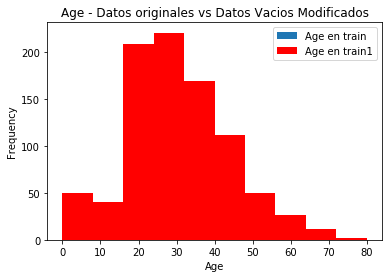

In [238]:
# Visualizamos el histograma para el atributo edad en el dataset original y en el de prueba
# actualizado que no contiene valores vacios en Age
fig = plt.figure()
ax = fig.add_subplot(111)
train['Age'].plot(kind='hist', ax=ax, label="Age en train")
train1['Age'].plot(kind='hist', ax=ax, color='red', label="Age en train1")
plt.title('Age - Datos originales vs Datos Vacios Modificados')
plt.xlabel('Age')
plt.legend()

Como se visualiza que los nuevos datos para atributo Age son razonables, procederemos a actualizar 
dichos datos en el dataset original.

In [239]:
for cadaDataset in total_df:
    
    tot_edad_null = len(cadaDataset['Age'][np.isnan(cadaDataset['Age'])])
    edad_avg 	  = cadaDataset['Age'].mean()
    edad_std 	  = cadaDataset['Age'].std()  
    
    # lista de edades que reemplazaran a las edades faltantes por cada dataset
    lista_random_de_edades = np.random.randint(edad_avg - edad_std, 
                                               edad_avg + edad_std, 
                                               size=tot_edad_null)
    
    cadaDataset['Age'][np.isnan(cadaDataset['Age'])] = lista_random_de_edades
    cadaDataset['Age'] = cadaDataset['Age'].astype(int)

In [240]:
# Verificamos cuantos datos faltantes en el atributo Age hay en dataset train
len(train['Age'][np.isnan(train['Age'])])

0

In [241]:
# Verificamos cuantos datos faltantes en el atributo Age hay en dataset test
len(test['Age'][np.isnan(test['Age'])])

0

#### b) Datos vacios en el atributo Tarifa (Fare)

<p style="text-align: justify;">Existe un pasajero que no posee la tarifa de su ticket.&nbsp; Determinaremos quien es el pasajero y de acuerdo a sus caracterirticas reemplazaremos ese valor con uno razonable.</p>

In [242]:
# Identificamos al pasajero con el la tarifa de su ticket faltante
idx = test.index[test['Fare'].isna()]
test.loc[idx]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60,0,0,NaN,S


<p style="text-align: justify;">El pasajero se encuentra en la clase 3 (Pclass=3) y se embarc&oacute; en&nbsp;Southampton (Embarked='S'), por tanto, le corresponderia una tarifa 'mediana' correspondiente a tercera clase y embarcando en&nbsp;Southampton.&nbsp; La actualización la hacemos con el siguiente c&oacute;digo:</p>

In [243]:
# Obtenemos la mediana de la tarifa, solo para aquellos pasajeros que pertenecian a tercera clase, 
# y embarcaron en Southampton 

new_fare = test['Fare'].where(cond=((test['Pclass']== 3) & (test['Embarked']=='S'))).median()
new_fare

8.05

In [244]:
# Actualizamos el valor de la tarifa 'Fare' al pasajero que la tiene con valor NaN
# df.at[df.index[152], 'ColName'] = valor
test.at[test.index[idx],'Fare'] = new_fare

Comprobamos ahora que ya no existen valores vacios en los datasets y que el unico valor vacio en
el atributo 'Fare' fue correctamente actualizado:

In [245]:
# Verificamos si hay datos faltantes en el atributo Fare en dataset test
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### c) Datos vacios en el atributo Puerto de Embarque (Embarked)

Debemos inferir el puerto de embarque de los dos pasajeros a partir de la tarifa de su ticket.

In [246]:
# Ubicamos a los pasajeros que no poseen un puerto de embarque
sin_embarque = np.where(train["Embarked"].isnull() == True)
sin_embarque

(array([ 61, 829], dtype=int64),)

In [247]:
# Vemos los datos de los pasajeros sin puerto de embarque, coincide que ambos pertenecen a 1ra Clase
# y pagaron una tarifa de $80
# idx = test.index[test['Fare'].isna()]
train.loc[sin_embarque].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38,0,0,80.0,NaN
829,1,1,female,62,0,0,80.0,NaN


Analizaremos que tienen en comun los pasajeros que si embarcaron, pertenecen a 1ra clase y pagaron una tarifa por su ticket.

In [248]:
con_embarque = np.where((train["Embarked"].isnull() == False) & (train['Pclass'] == 1))
train.loc[con_embarque].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38,1,0,71.2833,C
3,1,1,female,35,1,0,53.1000,S
6,0,1,male,54,0,0,51.8625,S
11,1,1,female,58,0,0,26.5500,S
23,1,1,male,28,0,0,35.5000,S
27,0,1,male,19,3,2,263.0000,S
30,0,1,male,40,0,0,27.7208,C
31,1,1,female,28,1,0,146.5208,C
34,0,1,male,28,1,0,82.1708,C
35,0,1,male,42,1,0,52.0000,S


In [249]:
# Mostramos la tarifa promedio pagada por Puerto de Embarque, cuando la Clase es 1 = Primera clase
train[['Embarked', 'Pclass', 'Fare']].where(
    (train["Embarked"].isnull() == False) & 
    (train['Pclass'] == 1)).groupby(['Embarked'], as_index=False).mean()

,Embarked,Pclass,Fare
0,C,1.0,104.718529
1,Q,1.0,90.000000
2,S,1.0,70.364862


<p style="text-align: justify;">Se puede observar que los pasajeros que pertenecen a 1ra. Clase, pagaron por su Ticket de Embarque, tarifas promedio comprendidas en estos rangos de precios:</p>
<ul>
<li style="text-align: justify;">De 70 a 90 si embarcaron en "S"</li>
<li style="text-align: justify;">De 91 a 105 si embarcaron en "Q"</li>
<li style="text-align: justify;">Más de 105 si embarcaron en "C"</li>
</ul>
<p>Nuestros pasajeros que pagaron entonces una tarifa de $80 les corresponde entonces el puerto de embarque S (Southampton).</p>

In [250]:
# Actualizamos el valor del embarque 'Embarked' a los pasajeros que lo tiene con valor NaN
# df.at[df.index[152], 'ColName'] = valor
train.at[train.index[sin_embarque],'Embarked'] = 'S'

# Verificamos si hay datos faltantes en el atributo "Embarked" del dataset train
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>3.2. Creación de nuevas variables:</strong> 
</div>

<p style="text-align: justify;">A partir del dataset inicial podemos generar algunas variables adicionales interesantes, relacionadas al pasajero, y cuyos datos podrian tomarse en cuenta para el analisis.&nbsp; Estas variables responder&aacute;n a las siguientes preguntas:</p>
<ul>
<li>El pasajero viaja en familia o no?</li>
<li>El pasajero es adulto o menor de edad?</li>
</ul>
<p>A continuaci&oacute;, vamos a crear las siguientes variables nuevas:</p>
<ul>
<li><strong>enFamilia</strong>: A partir de los atributos&nbsp;Siblings/Spouses o Parents/Children, se podr&aacute; identificar si el pasajero viajaba en famiia o solo.</li>
<li><strong>rangoEdad</strong>: Nos interesa tambien descubrir si el pasajero era adulto o ni&ntilde;o.</li>
</ul>

In [251]:
# Creacion de variable enFamilia
train['enFamilia'] = (train['SibSp'] > 0) | (train['Parch'] > 0)
test['enFamilia'] = (test['SibSp'] > 0) | (test['Parch'] > 0)

# Creacion de variable rangoEdad (-1 para cubrir a los niños menores a un año)
train['rangoEdad'] = pd.cut(train['Age'], [-1, 15, 80], labels=['niño', 'adulto'])
test['rangoEdad'] = pd.cut(test['Age'], [-1, 15, 80], labels=['niño', 'adulto'])


In [252]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,enFamilia,rangoEdad
0,0,3,male,22,1,0,7.2500,S,True,adulto
1,1,1,female,38,1,0,71.2833,C,True,adulto
2,1,3,female,26,0,0,7.9250,S,False,adulto
3,1,1,female,35,1,0,53.1000,S,True,adulto
4,0,3,male,35,0,0,8.0500,S,False,adulto


In [253]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,enFamilia,rangoEdad
0,3,male,34,0,0,7.8292,Q,False,adulto
1,3,female,47,1,0,7.0000,S,True,adulto
2,2,male,62,0,0,9.6875,Q,False,adulto
3,3,male,27,0,0,8.6625,S,False,adulto
4,3,female,22,1,1,12.2875,S,True,adulto


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>3.3. Identificación y tratamiento de valores extremos | Transformación de datos:</strong> 
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>3.3.1. Identificación y tratamiento de valores extremos:</strong> 
</div>

Los valores extremos son valores numericos atipicos (outliers) que se encuentran distantes de los valores "tipicos" que puede tomar una variable.  Analizaremos la variable tarifa del ticket o 'Fare' y mediante un gráfico de cajas podremos observar si existen valores atipicos.

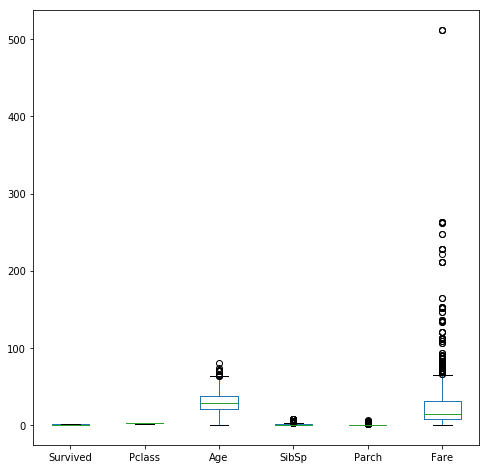

In [254]:
train.plot(kind="box",figsize=(8,8))

Observamos en el diagrama anterior que de todas las variables numericas del dataset train, sólo la variable 'Fare' presenta valores atipicos, esto quiere decir, que hay pasajeros que pagaron una tarifa muy superior por el Ticket de Embarque.  Conozcamos quienes y cuantos pasajeros fueron:

In [255]:
idx = np.where(train["Fare"] == max(train["Fare"]) )
train.loc[idx]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,enFamilia,rangoEdad
258,1,1,female,35,0,0,512.3292,C,False,adulto
679,1,1,male,36,0,1,512.3292,C,True,adulto
737,1,1,male,35,0,0,512.3292,C,False,adulto


<p style="text-align: justify;">Son tres los pasajeros que pagaron una tarifa bastante alta por el ticket de embarque. A pesar de eello, no se eliminar&aacute;n estos valores.</p>
<p style="text-align: justify;">En el paso siguiente, <strong>"Transformaci&oacute;n de Datos"</strong>, se mostrar&aacute; que al transformar los datos de la tarifa (Fare) por valores en el rango de 0 a 4, este valor extremo dejar&aacute; de serlo.</p>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>3.3.2. Transformación de Datos:</strong> 
</div>

<p style="text-align: justify;">Como mencionamos anteriormente, los atributos sexo y embarcado son variables que poseen diferentes niveles de valores, por lo tanto, son variables categ&oacute;ricas que deber&aacute;n convertirse a numericas (pclass lo era pero se elimin&oacute; para efecto de esta pr&aacute;ctica).</p>

In [256]:
# Variables categoricas en el conjunto de datos de train
categoricasX = train.dtypes[train.dtypes == "object"].index
print(categoricasX)

train[categoricasX].describe()

Index(['Sex', 'Embarked'], dtype='object')


,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [257]:
# Variables categoricas en el conjunto de datos de test
categoricasY = test.dtypes[test.dtypes == "object"].index
print(categoricasY)

test[categoricasY].describe()

Index(['Sex', 'Embarked'], dtype='object')


,Sex,Embarked
count,418,418
unique,2,3
top,male,S
freq,266,270


##### Transformación de las atributos Sex , Embarked, enFamilia, rangoEdad

In [258]:
from sklearn import preprocessing

# Inicializamos el encoder de la etiqueta
label_enc = preprocessing.LabelEncoder()

# Convertimos las variables sexo y embarcado de categoricas a numericas en datasets train y test
train["Sex"] = label_enc.fit_transform(train["Sex"])
train["Embarked"] = label_enc.fit_transform(train["Embarked"])
train["enFamilia"] = label_enc.fit_transform(train["enFamilia"])
train["rangoEdad"] = label_enc.fit_transform(train["rangoEdad"])

test["Sex"] = label_enc.fit_transform(test["Sex"])
test["Embarked"] = label_enc.fit_transform(test["Embarked"])
test["enFamilia"] = label_enc.fit_transform(test["enFamilia"])
test["rangoEdad"] = label_enc.fit_transform(test["rangoEdad"])

In [259]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,enFamilia,rangoEdad
0,0,3,1,22,1,0,7.2500,2,1,0
1,1,1,0,38,1,0,71.2833,0,1,0
2,1,3,0,26,0,0,7.9250,2,0,0
3,1,1,0,35,1,0,53.1000,2,1,0
4,0,3,1,35,0,0,8.0500,2,0,0


In [260]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,enFamilia,rangoEdad
0,3,1,34,0,0,7.8292,1,0,0
1,3,0,47,1,0,7.0000,2,1,0
2,2,1,62,0,0,9.6875,1,0,0
3,3,1,27,0,0,8.6625,2,0,0
4,3,0,22,1,1,12.2875,2,1,0


<p style="text-align: justify;">La edad (Age) y la tarifa (Fare), siendo atributos numericos, deben transformarse en rangos adecuados para ser analizados con el resto de atributos.</p>
<p style="text-align: justify;">Los rangos ser&aacute;n los siguientes:</p>
<p style="text-align: justify;"><strong>Edad:</strong></p>
<ul style="list-style-type: square;">
<li style="text-align: justify;">Age &lt;= 16 a&ntilde;os&nbsp; &nbsp; -&gt; 0</li>
<li style="text-align: justify;">Age &gt; 16 y &lt;= 32 -&gt; 1</li>
<li style="text-align: justify;">Age &gt; 32 y &lt;= 48 -&gt; 2</li>
<li style="text-align: justify;">Age &gt; 48 y &lt;= 64 -&gt; 3</li>
<li style="text-align: justify;">Age &gt; 64&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; -&gt; 4</li>
</ul>
<p><strong>Tarifa:</strong></p>
<ul>
<li>Fare &lt;= 7.91&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;-&gt; 0</li>
<li>Fare &gt; 7.91 &lt;= 14.454&nbsp; -&gt; 1</li>
<li>Fare &gt;&nbsp;14.454&nbsp; &lt;= 31&nbsp; &nbsp; -&gt; 2</li>
<li>Fare &gt; 31&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; -&gt; 3</li>
</ul>

In [261]:
total_df= [train, test]

for cadaDataset in total_df:
    # Transformamos el atributo Age (edad) en un rango de 0 a 4
    cadaDataset.loc[ cadaDataset['Age'] <= 16, 'Age'] = 0
    cadaDataset.loc[(cadaDataset['Age'] > 16) & (cadaDataset['Age'] <= 32), 'Age'] = 1
    cadaDataset.loc[(cadaDataset['Age'] > 32) & (cadaDataset['Age'] <= 48), 'Age'] = 2
    cadaDataset.loc[(cadaDataset['Age'] > 48) & (cadaDataset['Age'] <= 64), 'Age'] = 3
    cadaDataset.loc[ cadaDataset['Age'] > 64, 'Age'] = 4 
    cadaDataset['Age'] = cadaDataset['Age'].astype(int)

    # Transformamos el atributo Fare (tarifa) en un rango de 0 a 3
    cadaDataset.loc[ cadaDataset['Fare'] <= 7.91, 'Fare'] = 0
    cadaDataset.loc[(cadaDataset['Fare'] > 7.91)   & (cadaDataset['Fare'] <= 14.454), 'Fare'] = 1
    cadaDataset.loc[(cadaDataset['Fare'] > 14.454) & (cadaDataset['Fare'] <= 31), 'Fare']     = 2
    cadaDataset.loc[ cadaDataset['Fare'] > 31, 'Fare'] = 3
    cadaDataset['Fare'] = cadaDataset['Fare'].astype(int)


In [262]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,enFamilia,rangoEdad
0,0,3,1,1,1,0,0,2,1,0
1,1,1,0,2,1,0,3,0,1,0
2,1,3,0,1,0,0,1,2,0,0
3,1,1,0,2,1,0,3,2,1,0
4,0,3,1,2,0,0,1,2,0,0


In [263]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,enFamilia,rangoEdad
0,3,1,2,0,0,0,1,0,0
1,3,0,2,1,0,0,2,1,0
2,2,1,3,0,0,1,1,0,0
3,3,1,1,0,0,1,2,0,0
4,3,0,1,1,1,1,2,1,0


<p style="text-align: justify;">Junto con los atributos originales seleccionados, las nuevas variables creadas <strong>enFamilia</strong> y <strong>rangoEdad</strong> se utilizar&aacute;n en el proceso de an&aacute;lisis de datos siguiente.</p>

#### Generación de archivo de datos limpio

In [303]:
train.to_csv("train_clean.csv", index=False)
test.to_csv("test_clean.csv", index=False)

## 4. Análisis de los datos



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar)</strong> 
</div>

<p style="text-align: justify;">A continuaci&oacute;n, se seleccionan los grupos dentro de nuestro conjunto de datos que pueden resultar interesantes para analizar y/o comparar. Compararemos basicamente cada una de las variables de nuestro conjunto de datos con la variable objetivo "Survived", porque nos interesa conocer que tan relacionadas están, ello conllevará a definir si tiene o no un gran impacto.</p>

### Análisis de datos individuales

#### 1. Clase del pasajero vs Supervivencia

In [221]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


<p style="text-align: justify;">- Se observa que los pasajeros perteneciente a la Primera Clase (Pclass = 1) fueron los que mayormente sobrevivieron.</p>

#### 2. Sexo del pasajero vs Supervivencia

In [224]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

   Sex  Survived
0    0  0.742038
1    1  0.188908


<p style="text-align: justify;">- Se observa que los pasajeros de sexo femenino (Sex = 0) fueron los que mayormente sobrevivieron.</p>

#### 3. Pasajero viajaba solo o en Familia vs Supervivencia

In [265]:
print (train[['enFamilia', 'Survived']].groupby(['enFamilia'], as_index=False).mean())

   enFamilia  Survived
0          0  0.303538
1          1  0.505650


<p style="text-align: justify;">- Se observa que los pasajeros que viajaban solos (enFamilia = 1) fueron los que mayormente sobrevivieron.</p>

#### 4. Puerto de Embarque vs Supervivencia

In [266]:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


<p style="text-align: justify;">Recordemos que Embarked es:</p>
<p style="text-align: justify;">= 0 -&gt; "C" &oacute;&nbsp;<a title="Cherburgo-Octeville" href="https://es.wikipedia.org/wiki/Cherburgo-Octeville">Cherburgo</a><br />= 1&nbsp;-&gt; "Q" &oacute;&nbsp;<a class="mw-redirect" title="Queenstown (Irlanda)" href="https://es.wikipedia.org/wiki/Queenstown_(Irlanda)">Queenstown</a><br />= 2 -&gt; "S" &oacute; <a title="Southampton" href="https://es.wikipedia.org/wiki/Southampton">Southampton</a></p>
<p style="text-align: justify;">- Se observa que los pasajeros que embarcaron en "C"&nbsp; (Embarked = 0) fueron los que mayormente sobrevivieron.</p>

#### 5. Tarifa del ticket vs Supervivencia

<p style="text-align: justify;">Recordemos que los rangos de Tarifa para los tickets de embarque que se han contemplado son los siguientes:</p>
<p><strong>Tarifa:</strong></p>
<ul>
<li>Fare &lt;= 7.91&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;-&gt; 0</li>
<li>Fare &gt; 7.91 &lt;= 14.454&nbsp; -&gt; 1</li>
<li>Fare &gt;&nbsp;14.454&nbsp; &lt;= 31&nbsp; &nbsp; -&gt; 2</li>
<li>Fare &gt; 31&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; -&gt; 3</li>
</ul>

In [267]:
print (train[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean())

   Fare  Survived
0     0  0.197309
1     1  0.308756
2     2  0.445415
3     3  0.581081


<p style="text-align: justify;">- Se observa que los pasajeros que pagaron una mayor tarifa por su ticket de embarque (Fare = 2 y 3) fueron los que mayormente sobrevivieron.</p>

#### 6. Edad del Pasajero vs Supervivencia

<p style="text-align: justify;">Recordemos que los rangos de edad de los pasajeros que se han contemplado son los siguientes:</p>
<p style="text-align: justify;"><strong>Edad:</strong></p>
<ul style="list-style-type: square;">
<li style="text-align: justify;">Age &lt;= 16 a&ntilde;os&nbsp; &nbsp; -&gt; 0</li>
<li style="text-align: justify;">Age &gt; 16 y &lt;= 32 -&gt; 1</li>
<li style="text-align: justify;">Age &gt; 32 y &lt;= 48 -&gt; 2</li>
<li style="text-align: justify;">Age &gt; 48 y &lt;= 64 -&gt; 3</li>
<li style="text-align: justify;">Age &gt; 64&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; -&gt; 4</li>

In [268]:
print (train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean())

   Age  Survived
0    0  0.540541
1    1  0.357143
2    2  0.360902
3    3  0.434783
4    4  0.090909


<p style="text-align: justify;">- Se observa que los pasajeros que por edad sobrevivieron, fueron los ni&ntilde;os mayores menores de 16 a&ntilde;os y los adultos entre 49 y 64 a&ntilde;os (Fare = 0 y 3) fueron los que mayormente sobrevivieron.</p>

### Análisis de datos agrupados

#### 1. Agrupamiento: Clase, Sexo y rango de Edad

<p style="text-align: justify;">Nos interesa comparar la tasa de supervivencia con las siguientes tres variables:</p>
<ul>
<li style="text-align: justify;">Clase</li>
<li style="text-align: justify;">Sexo</li>
<li style="text-align: justify;">Rango de edad</li>
</ul>

In [272]:
conjunto_datos = pd.concat(
    [train.groupby(['Pclass', 'Sex', 'rangoEdad'])['Survived'].mean(),
     train.groupby(['Pclass', 'Sex', 'rangoEdad'])['Survived'].count()],
    axis=1)
conjunto_datos.columns = ['Sobrevivieron', 'Num']
conjunto_datos

Sobrevivieron  Num
Pclass Sex rangoEdad                    
1      0   0               0.978022   91
           1               0.666667    3
       1   0               0.347458  118
           1               1.000000    4
2      0   0               0.909091   66
           1               1.000000   10
       1   0               0.080808   99
           1               1.000000    9
3      0   0               0.481818  110
           1               0.558824   34
       1   0               0.119874  317
           1               0.300000   30

<p style="text-align: justify;">Se observa en general, que en las tres clases sobrevivieron m&aacute;s mujeres y ni&ntilde;os que adultos hombres.</p>

#### 2. Agrupamiento: Sexo y Tarifa

Habrá sido importante esta relacion? Revisemos la tarifa promedio pagada por cada sexo (0: mujer, 1:hombre):

In [275]:
tarifa_por_sexo = train.groupby('Sex')['Fare'].mean()
tarifa_por_sexo

Sex
0    1.882166
1    1.299827
Name: Fare, dtype: float64

<p>Se puede observar que las mujeres pagaron una tarifa superior por su ticket de embarque que los hombres.</p>

#### 3. Agrupamiento: Clase, Sexo y Tarifa

<p>Hemos observado que las mujeres pagaron por su ticket de embarque más que los hombres, pero a continuaci&oacute;n veremos si la clase del ticket fue ifluyente para que sea asi.</p>

In [277]:
tarifa_por_clase_sexo = train.groupby(['Pclass', 'Sex'])['Fare'].mean()
tarifa_por_clase_sexo

Pclass  Sex
1       0      2.914894
        1      2.500000
2       0      1.736842
        1      1.481481
3       0      1.284722
        1      0.821326
Name: Fare, dtype: float64

-Se observa que independiente de la clase, las mujeres pagaron una tarifa superior a los hombres.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>4.2. Comprobación de la normalidad y homogeneidad de la varianza</strong> 
</div>

In [ ]:
import scipy
resultado_anderson = scipy.stats.anderson(train)
print(resultado_anderson)

<p style="text-align: justify;">Para verificar que los valores que toman nuestras variables cuantitativas dentro de nuestro conjunto de datos "train" provienen de una poblaci&oacute;n distribuida normalmente, reealizaremos la prueba de normalidad de Anderson-Darling.</p>
<p style="text-align: justify;">La salida de esta prueba de normalidad es comprobar que para cada ensayo, se obtiene un valor (p-valor) superior al valor pre-fijado de 0,05.&nbsp; De cumplirse esta condici&oacute;n, se concluiria que nuestras variables tienen una distribuci&oacute;n normal.</p>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos</strong> 
</div>

<p style="text-align: justify;">A continuaci&oacute;n vamos a generar &nbsp;un gr&aacute;fico de correlaci&oacute;n de las caracter&iacute;sticas para ver c&oacute;mo se relaciona una caracter&iacute;stica con la siguiente. Para hacerlo, utilizaremos el paquete gráfico llamado Seaborn que nos permite trazar mapas de calor de la siguiente manera:</p>

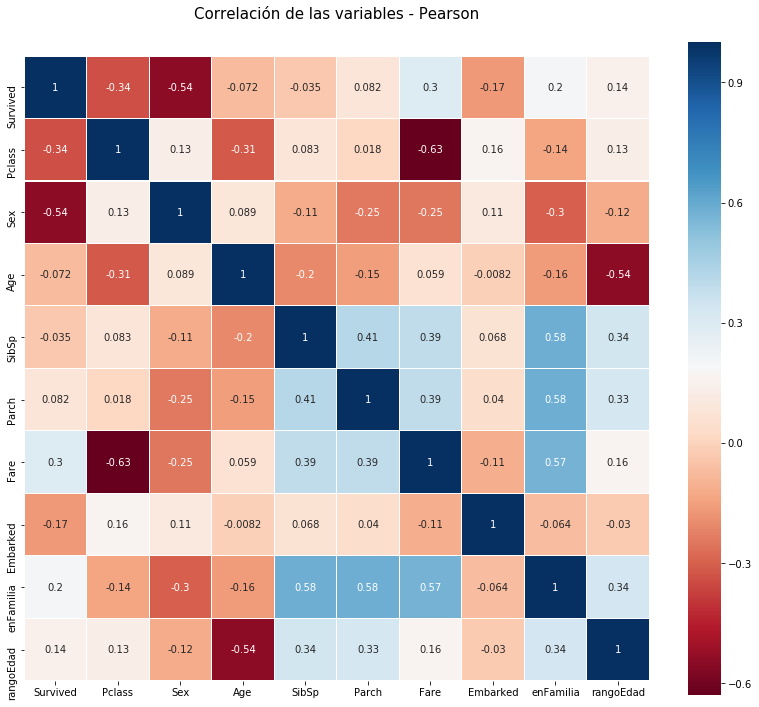

In [270]:
import seaborn as sns

mapacolor = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlación de las variables - Pearson', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=mapacolor, linecolor='white', annot=True)

<p style="text-align: justify;">El gr&aacute;fico anterior, de Correlaci&oacute;n de Pearson, nos permite visualizar que no hay demasiadas caracter&iacute;sticas fuertemente correlacionadas entre s&iacute;. Esto es bueno desde el punto de vista que las variables de nuestro conjunto de datos (de train) no poseen mucha informaci&oacute;n redundante o poco relevante, sino datos unicos, entonces ser&aacute; un buen conjunto de entrenamiento para ser usado posteriormente en modelos de machine learning.</p>

## 5. Representación de los resultados a partir de tablas y gráficas



A continuación se visualiza graficamente los resultados obtenidos a partir del analisis individual y grupal de las variables anteriormente evaluadas.

#### 1. Gráfico de Agrupamiento: Clase, Sexo y rango de Edad

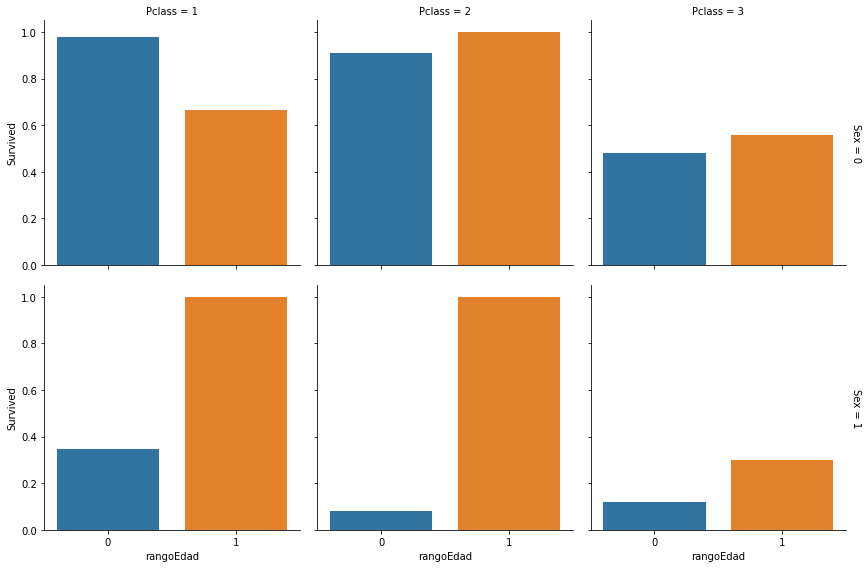

In [274]:
g = sns.factorplot(
    x='rangoEdad', 
    y='Survived', 
    col='Pclass',
    row='Sex',
    data=train,
    margin_titles=True, 
    kind="bar", 
    ci=None)

<p style="text-align: justify;">Efectivamente, en las tres clases sobrevivieron m&aacute;s mujeres y ni&ntilde;os que adultos hombres.</p>

#### 2. Gráfico de Agrupamiento: Sexo y Tarifa

<p style="text-align: justify;">Revisemos la tarifa promedio pagada por cada sexo:</p>

Text(0,0.5,'Tarifa Promedio')

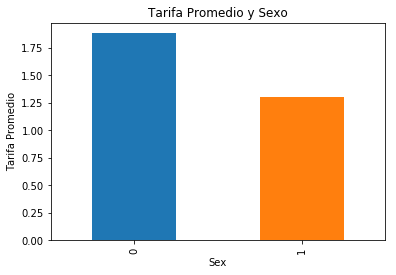

In [280]:
ax = tarifa_por_sexo.plot.bar(title='Tarifa Promedio y Sexo')
ax.set_ylabel('Tarifa Promedio')

<p style="text-align: justify;">Efectivamente, se grafica que los pasajeros del sexo femenio (Sex = 0) pagaron una tarifa mayor que la de los hombres. El por que escapa al an&aacute;lisis de esta pr&aacute;ctica.</p>

#### 3. Gráfico de Agrupamiento: Clase, Sexo y Tarifa

Text(0,0.5,'Tarifa Promedio')

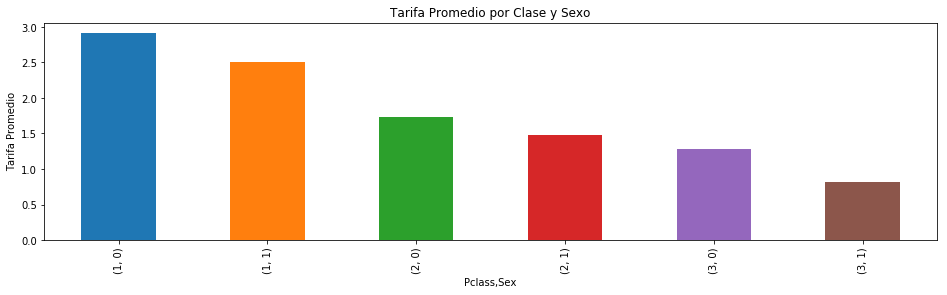

In [278]:
ax = tarifa_por_clase_sexo.plot.bar(figsize=(16,4), title='Tarifa Promedio por Clase y Sexo')
ax.set_ylabel('Tarifa Promedio')

<p style="text-align: justify;">En el grafico de barras anterior, se observa que la barra azul representa el promedio de tarifa pagada por las mujeres en Primera clase, la barra verde en Segunda clase y la barra morada en Tercera clase, en relacion a la tarifa promedio que pagaron los hombre en las mismas clases.</p>

## 6. Conclusiones
<ol>
<li style="text-align: justify;">Se han realizado tareas de limpieza y validaci&oacute;n de datos sobre el dataset Titanic (train y test, respectivamente).&nbsp; Operaciones tales como: correeccion de valores en cero o nulos, transformacion de variables categoricas a numericas, creacion de nuevas variables y deteccion de outliers.</li>
<li style="text-align: justify;">Con respecto al analisis de datos, se ha observado&nbsp; la importaancia de las variables con respecto a la variable objetivo "Supervivencia".&nbsp; Asi:
<ul>
<li>Analizando los tres factores combinados (Clase, Sexo y Rango de edad), nos reporta los resultados esperados. Se puede observar que en las tres clases del barco las mujeres presentan una tasa de supervivencia mayor a la de los hombres, no interesaba su Clase, ser mujer fue m&aacute;s importante que pobre o rica.</li>
<li>Los ni&ntilde;os tambien fueron prioridad, por tanto se puede concluir que mujeres y ni&ntilde;os son los dos principales pasajeros que tuvieron prioridad para ser salvados.</li>
<li>Se comprueba asi que se aplic&oacute; el protocolo de&nbsp;"mujeres y ni&ntilde;os primero" durante las tareas de salvataje.</li>
</ul>
</li>
<li style="text-align: justify;">Graficamente se ha mostrado como cierto conjunto de variables incidieron en el hecho de que ciertos pasajeros sobrevivieran al hundimiento.</li>
<li style="text-align: justify;">Mediante el analisis de correlacion de Pearson, hemos observado que no hay demasiadas caractersticas fuertemente correlacionadas entre si. Esto es bueno desde el punto de vista que las variables de nuestro conjunto de datos (de train) no poseen mucha informacion redundante o poco relevante, sino datos unicos, entonces se trata de un buen conjunto de entrenamiento para ser usado posteriormente en modelos de machine learning.</li>
<li style="text-align: justify;">Se han generado los archivos<strong> test_clean.csv</strong> y <strong>test_clean.csv</strong> que serviran como conjunto de datos para ser utilizados como entrada en cualquier modelo de clasificaci&oacute;n (p.e. Arboles de Desici&oacute;n), a fin de predecir con la mayor precision posible la tasa de sobrevivencia.</li>
</ol>